In [123]:
import pandas as pd

In [124]:
raw_data=pd.read_csv('prostate.data.txt',delimiter='\t')

In [125]:
raw_data.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [126]:
X=raw_data.iloc[:,1:-3]
y=raw_data.iloc[:,-2]


In [127]:
from sklearn import preprocessing
std_scale=preprocessing.StandardScaler().fit(X)
X_scale=std_scale.transform(X)


In [128]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.25)

In [129]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [130]:
import numpy as np 

baseline_error=np.mean((lr.predict(X_test)-y_test)**2)
print(baseline_error)

0.4147382463225286


In [131]:
n_alphas=50

alphas=np.logspace(-5,5,50)
coefs=[]
errors=[]

ridge=linear_model.Ridge()
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train,y_train)
    coefs.append(ridge.coef_)
    errors.append(np.mean((ridge.predict(X_test)-y_test)**2))
    
    

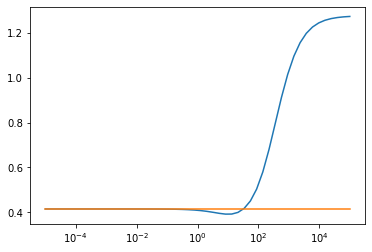

[0.4147381805424443,
 0.41473814108376056,
 0.4147380779555563,
 0.41473797695964215,
 0.41473781538120136,
 0.4147375568804506,
 0.4147371433207026,
 0.41473648169615684,
 0.41473542322266693,
 0.4147337298973175,
 0.4147310210276352,
 0.41472668776050725,
 0.41471975653147103,
 0.41470867109127746,
 0.4146909450280753,
 0.4146626090434779,
 0.4146173348203442,
 0.4145450541053172,
 0.4144298022526647,
 0.4142464019795199,
 0.4139554945660129,
 0.4134964294392142,
 0.412777944795263,
 0.41166816502619485,
 0.40998980436080934,
 0.4075362537956857,
 0.40414146350412183,
 0.3998544433011875,
 0.3952538512252673,
 0.39182523301116684,
 0.39212574573532294,
 0.3994832095513076,
 0.41754931592892247,
 0.4504376380388085,
 0.5030894841835056,
 0.5798571185530538,
 0.6803370464463816,
 0.7958560413489196,
 0.9116824985514476,
 1.014067195927552,
 1.095638226406823,
 1.15570763193561,
 1.197533331857447,
 1.225566170018822,
 1.2438869789036358,
 1.25566662719817,
 1.2631618948183385,
 1.26789

In [132]:
import matplotlib.pyplot as plt

ax=plt.gca()
ax.plot(alphas,errors,[10**-5,10**5],[baseline_error,baseline_error])
ax.set_xscale("log")
plt.show()
errors

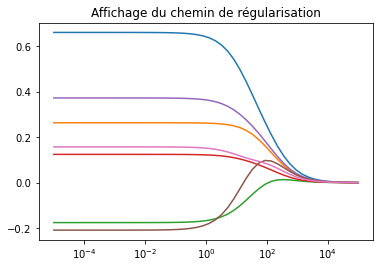

In [133]:

ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")
plt.title("Affichage du chemin de régularisation")

plt.show()


In [134]:

errors[np.argmin(errors)]

print(errors[np.argmin(errors)])

0.39182523301116684


In [135]:
n_alphas = 300
alphas = np.logspace(-5, 1, 300)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

print(errors[np.argmin(errors_lasso)])

errors

7.387071841107124


[7.387071841107124,
 7.387074095615281,
 7.3870764567474225,
 7.387078929546609,
 7.387081519294484,
 7.387084231522539,
 7.387087072023944,
 7.387090046865938,
 7.387093162402798,
 7.38709642528942,
 7.387099033699351,
 7.387102612686408,
 7.387106360944995,
 7.387110286482039,
 7.387114397683332,
 7.387118703331441,
 7.387123212624516,
 7.387127935195948,
 7.387132881134986,
 7.387138061008322,
 7.3871434858827065,
 7.3871491673486185,
 7.387155117545085,
 7.387159940772184,
 7.387166467817475,
 7.387173303598189,
 7.387180462721388,
 7.38718796048559,
 7.387195812913513,
 7.387204036786412,
 7.387210762391237,
 7.387219784317462,
 7.387229233027582,
 7.3872391287175425,
 7.387249492539656,
 7.387260346647937,
 7.387271714245631,
 7.387283619634966,
 7.387296088269302,
 7.387309146807749,
 7.387322823172368,
 7.387337146608137,
 7.387352147745743,
 7.387367858667375,
 7.38738431297565,
 7.387401545865832,
 7.387419596575621,
 7.387438502886081,
 7.3874583038803925,
 7.387479041926829

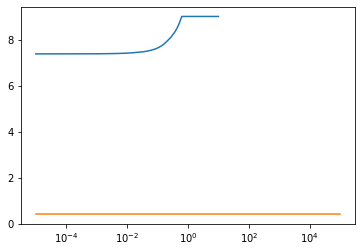

In [136]:
ax=plt.gca()
ax.plot(alphas,errors,[10**-5,10**5],[baseline_error,baseline_error])
ax.set_xscale("log")
plt.show()

In [137]:
print(errors[np.argmin(errors)])

7.387071841107124


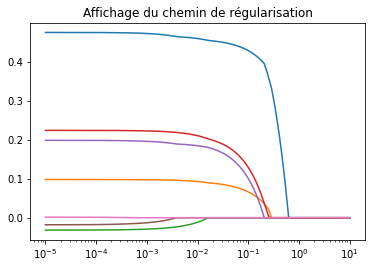

In [138]:

ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")
plt.title("Affichage du chemin de régularisation")

plt.show()
